In [226]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
csv_path = "show list.csv"

shows = pd.read_csv(csv_path)
shows = shows["Title"]


In [3]:
base_url = "http://api.tvmaze.com/search/shows?q="

In [4]:

responses = []
show_info = []
show_name = []
show_id = []
tvrage = []
thetvdb = []
imdb = []



for show in shows: 
    mod_url = base_url + show
    
#     print(json.dumps(response_json, indent=4, sort_keys=True))

    
    try:
        show_data = requests.get(mod_url)
        response_json = show_data.json()
        show_name.append(response_json[0]['show']['name'])
        show_id.append(response_json[0]['show']['id'])
        tvrage.append(response_json[0]['show']['externals']['tvrage'])
        thetvdb.append(response_json[0]['show']['externals']['thetvdb'])
        imdb.append(response_json[0]['show']['externals']['imdb'])                       
        
    except:
        pass
                         
                         
                 

In [61]:
show_data_df = pd.DataFrame({"Show Name": show_name, "Show ID": show_id})
show_data_df.head()

,Show Name,Show ID
0,The Amazing Spider-Man,7623
1,The Incredible Hulk,2151
2,Spider-Man,1611
3,Blade,8331
4,Marvel's Agents of S.H.I.E.L.D.,31


In [7]:
cast_response = []
character_name = []
character_id = []
show_id_cast = []


for ids in show_id: 
    cast_url = (f"http://api.tvmaze.com/shows/{ids}?embed[]=episodes&embed[]=cast")
    
    
    try:
        cast_data = requests.get(cast_url).json()
        cast_response.append(cast_data)
        for i in range(0, 150): 
                character_name.append(cast_data['_embedded']['cast'][i]['character']['name'])
                character_id.append(cast_data['_embedded']['cast'][i]['character']['id'])
                show_id_cast.append(cast_data["id"])

    except:
        pass
                         
                   

In [8]:
character_data_df = pd.DataFrame({"Show ID": show_id_cast, "Character Name": character_name, "Character ID": character_id})
character_data_df

,Show ID,Character Name,Character ID
0,7623,Peter Parker/Spider-Man,196352
1,7623,Captain Barbera,365202
2,7623,J. Jonah Jameson,365203
3,7623,J. Jonah Jameson,365203
4,7623,Rita Conway,365204
...,...,...,...
441,33734,Rocket,725916
442,33734,Groot,725918
443,33734,Doctor Strange,725921
444,33734,She-Hulk,725928


In [10]:
episode_id = []
episode_season = []
episode_num = []
episode_air = []
episode_name = []
show_id_ep = []


for ids in show_id: 
    cast_url = (f"http://api.tvmaze.com/shows/{ids}?embed[]=episodes&embed[]=cast")
    
    
    try:
        cast_data = requests.get(cast_url).json()
        for i in range(0, 150): 
                episode_id.append(cast_data['_embedded']['episodes'][i]['id'])
                episode_season.append(cast_data['_embedded']['episodes'][i]['season'])
                episode_num.append(cast_data['_embedded']['episodes'][i]['number'])
                episode_air.append(cast_data['_embedded']['episodes'][i]['airstamp'])
                episode_name.append(cast_data['_embedded']['episodes'][i]['name'])
                show_id_ep.append(cast_data["id"])

    except:
        pass
                         
                   

In [174]:
episode_data_df = pd.DataFrame({"Show ID": show_id_ep, "Episode Name": episode_name, "Episode ID": episode_id, "Episode Name": episode_name, "Episode Season": episode_season, "Episode Number": episode_num, "Episode Air Date": episode_air})
episode_data_df = episode_data_df.groupby(["Show ID"])
episode_data_df.head()

,Show ID,Episode Name,Episode ID,Episode Season,Episode Number,Episode Air Date
0,7623,The Amazing Spider-Man,429649,1,1,1977-09-15T00:00:00+00:00
1,7623,The Deadly Dust: Part 1,429650,1,2,1978-04-06T01:00:00+00:00
2,7623,The Deadly Dust: Part 2,429651,1,3,1978-04-13T01:00:00+00:00
3,7623,The Curse of Rava,429652,1,4,1978-04-20T01:00:00+00:00
4,7623,Night of the Clones,429653,1,5,1978-04-27T01:00:00+00:00
14,2151,The Incredible Hulk,177665,1,1,1977-11-04T17:00:00+00:00
15,2151,Death in the Family,177666,1,2,1977-11-27T17:00:00+00:00
16,2151,The Final Round,177667,1,3,1978-03-10T17:00:00+00:00
17,2151,The Beast Within,177668,1,4,1978-03-17T17:00:00+00:00
18,2151,"Of Guilt, Models, and Murder",177669,1,5,1978-03-24T17:00:00+00:00


In [77]:
episode_count_df = pd.DataFrame({"Total Episode Count": (episode_data_df["Episode ID"].count())})

In [78]:
merged_df = pd.merge(character_data_df, episode_count_df, how='inner', on="Show ID")

In [74]:
name_merge_df = pd.merge(merged_df, show_data_df, how='inner', on="Show ID")
name_merge_df = name_merge_df[["Show ID", "Show Name", "Total Episode Count", "Character ID", "Character Name"]]
name_merge_df = name_merge_df.drop_duplicates()
name_merge_df

,Show ID,Show Name,Total Episode Count,Character ID,Character Name
0,7623,The Amazing Spider-Man,14,196352,Peter Parker/Spider-Man
1,7623,The Amazing Spider-Man,14,365202,Captain Barbera
2,7623,The Amazing Spider-Man,14,365203,J. Jonah Jameson
4,7623,The Amazing Spider-Man,14,365204,Rita Conway
5,7623,The Amazing Spider-Man,14,365205,Aunt May
...,...,...,...,...,...
461,33734,Marvel Super Hero Adventures,40,725916,Rocket
462,33734,Marvel Super Hero Adventures,40,725918,Groot
463,33734,Marvel Super Hero Adventures,40,725921,Doctor Strange
464,33734,Marvel Super Hero Adventures,40,725928,She-Hulk


In [217]:
# Cleaning Character Names Data
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({'James "Rhodey" Rhodes / War Machine': 'James Rhodes / War Machine', 'Peggy Carter': 'Agent Peggy Carter', "Peter Parker/Spider-Man": "Peter Parker / Spider-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Riri Williams / Ironheart": "Ironheart"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Wanda Maximoff / Scarlet Witch": "Scarlet Witch",  "Wanda Frank / Scarlet Witch": "Scarlet Witch"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Sue Richards / Invisible Girl": "Invisible Woman / Invisible Girl", "Sue Storm / Invisible Woman": "Invisible Woman / Invisible Girl", "Susan Richards / Invisible Woman": "Invisible Woman / Invisible Girl"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"T'Challa/Black Panther": "T'Challa / Black Panther", "T'Challa / The Black Panther": "T'Challa / Black Panther", "Black Panther": "T'Challa / Black Panther"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Tony Stark/Ironman": "Tony Stark / Iron Man", "Iron Man": "Tony Stark / Iron Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Peter Parker": "Peter Parker / Spider-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Ant-Man": "Scott Lang / Ant-Man", "Ant Man": "Scott Lang / Ant-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Steve Rogers/Captain America": "Steve Rogers / Captain America", "Captain America": "Steve Rogers / Captain America"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Daisy Johnson": "Daisy Johnson / Quake"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Wasp": "Janet van Dyne / The Wasp", "Janet van Dyne/Wasp": "Janet van Dyne / The Wasp"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Red Hulk": "Bruce Banner / Hulk", "Hulk": "Bruce Banner / Hulk", "The Hulk": "Bruce Banner / Hulk", "Bruce Banner/Hulk": "Bruce Banner / Hulk", "David Banner": "Bruce Banner / Hulk"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"The Beast": "Dr. Hank McCoy / Beast", "Beast": "Dr. Hank McCoy / Beast"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Thor Odinson": "Thor"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Storm": "Ororo Munroe / Storm", "Ororo Monroe/Storm": "Ororo Munroe / Storm"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Invisible Woman": "Invisible Woman / Invisible Girl"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Hope van Dyne / The Wasp": "Janet van Dyne/Wasp"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Hawkeye": "Clint Barton / Hawkeye"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Gwen Stacy": "Gwen Stacy / Ghost Spider", "Ghost-Spider": "Gwen Stacy / Ghost Spider"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Shadowcat": "Kitty Pryde / Shadowcat"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Miles Morales / Spider-Man": "Peter Parker / Spider-Man"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"The Thing": "Benjamin J. Grimm / The Thing", "Ben Grimm / The Thing": "Benjamin J. Grimm / The Thing"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Danny Rand / Iron Fist": "Daniel Rand / Iron Fist"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Phil Coulson": "Agent Phil Coulson"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Rocket": "Rocket Raccoon"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Melinda May": "Agent Melinda May"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Kamala Khan / Ms. Marvel": "Captain Marvel", "Ms. Marvel": "Captain Marvel", "Carol Danvers / Ms. Marvel": "Captain Marvel", "Carol Danvers / Captain Marvel": "Captain Marvel"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Jemma Simmons": "Agent Jemma Simmons"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Norrin Radd / Silver Surfer", "Silver Surfer / Dark Surfer"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Falcon": "Sam Wilson / Falcon"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Nightcrawler": "Kurt Wagner / Nightcrawler"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Wolverine": "Logan / Wolverine"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Julia Carpenter / Spider Woman": "Spider-Woman", "Jessica Drew / Spider-Woman": "Spider-Woman"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Jonah": "J. Jonah Jameson"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Mister Fantastic": "Prof. Reed Richards / Mister Fantastic"})
name_merge_df['Character Name'] = name_merge_df['Character Name'].replace({"Leo Fitz": "Agent Leo Fitz"})

In [218]:
character_appearances = name_merge_df.groupby(["Character Name"])[["Show ID"]].count()
character_appearances["Sum of Episodes"] = name_merge_df.groupby(["Character Name"])[["Total Episode Count"]].sum()
character_appearances = character_appearances.sort_values(by='Show ID', ascending=False)
character_appearances.head(10)

,Show ID,Sum of Episodes
Character Name,,
Peter Parker / Spider-Man,11,643
Bruce Banner / Hulk,9,911
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Janet van Dyne / The Wasp,6,276
Thor,6,313
Sam Wilson / Falcon,5,232
Logan / Wolverine,5,258
Vision,4,200


In [219]:
character_appearances = character_appearances.rename(columns={"Show ID":"Count of Shows"})
character_appearances.head(10)

,Count of Shows,Sum of Episodes
Character Name,,
Peter Parker / Spider-Man,11,643
Bruce Banner / Hulk,9,911
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Janet van Dyne / The Wasp,6,276
Thor,6,313
Sam Wilson / Falcon,5,232
Logan / Wolverine,5,258
Vision,4,200


In [221]:
character_appearances["Count of Shows"].describe()

count    275.000000
mean       1.450909
std        1.217403
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       11.000000
Name: Count of Shows, dtype: float64

In [222]:
num_ep_appearances = character_appearances.sort_values(by='Sum of Episodes', ascending=False)
num_ep_appearances.head(10)

,Count of Shows,Sum of Episodes
Character Name,,
Bruce Banner / Hulk,9,911
Peter Parker / Spider-Man,11,643
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Thor,6,313
Janet van Dyne / The Wasp,6,276
Logan / Wolverine,5,258
Steve Rogers / Captain America,4,257
Jack McGee,1,249


In [225]:
num_ep_appearances["Sum of Episodes"].describe()

count    275.000000
mean      59.614545
std       87.502391
min        1.000000
25%       20.000000
50%       33.000000
75%       67.000000
max      911.000000
Name: Sum of Episodes, dtype: float64

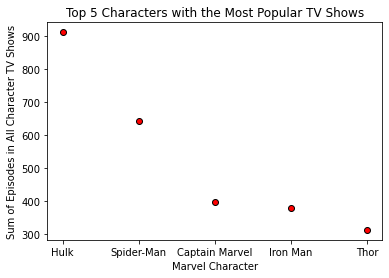

In [247]:
episodes_sca = ["Hulk", "Spider-Man", "Captain Marvel", "Iron Man","Thor"]
sum_ep_info = [911, 643, 396, 378, 313]
plt.title("Top 5 Characters with the Most Popular TV Shows")
plt.xlabel("Marvel Character")
plt.ylabel("Sum of Episodes in All Character TV Shows")
plt.scatter(episodes_sca, sum_ep_info, marker="o", facecolors="red", edgecolors="black")

In [245]:
top_five_characters = character_appearances.head(5)
top_five_characters

,Count of Shows,Sum of Episodes
Character Name,,
Peter Parker / Spider-Man,11,643
Bruce Banner / Hulk,9,911
Captain Marvel,7,396
Tony Stark / Iron Man,7,387
Janet van Dyne / The Wasp,6,276


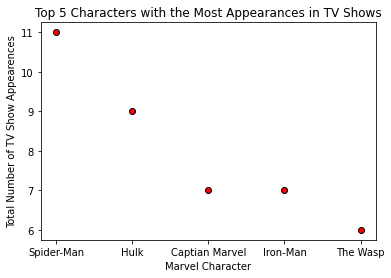

In [248]:
episodes_sca = ["Spider-Man", "Hulk", "Captian Marvel", "Iron-Man", "The Wasp"]
sum_ep_info = [11, 9, 7, 7, 6]
plt.title("Top 5 Characters with the Most Appearances in TV Shows")
plt.xlabel("Marvel Character")
plt.ylabel("Total Number of TV Show Appearences")
plt.scatter(episodes_sca, sum_ep_info, marker="o", facecolors="red", edgecolors="black")